<a href="https://colab.research.google.com/github/Sanjanathakal/CPE695FP/blob/master/SER_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SPEECH EMOTION RECOGNITION

### IMPORTING LIBRARIES

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import keras
import os
import os.path
import sys

import librosa                                                          #To extract the data from the audio files.
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier                      #For KNN
from sklearn.svm import SVC                                             #For SVM
from sklearn.preprocessing import LabelEncoder                          #For Naives Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio                                       #To play the audio files

### PREPROCESSING THE DATA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Defining the path of the dataset files.

In [3]:
Savee="/content/drive/MyDrive/CPE PROJECT/DATASETS/ALL"
Crema = "/content/drive/MyDrive/CPE PROJECT/DATASETS/AudioWAV"
Tess = "/content/drive/MyDrive/CPE PROJECT/DATASETS/TESS Toronto emotional speech set data"
Ravdess = "/content/drive/MyDrive/CPE PROJECT/DATASETS/audio_speech_actors_01-24"

In [ ]:
with open('/content/drive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/drive/My\ Drive/foo.txt

Hello Google Drive!

In [ ]:
"""Ravdess = "/Users/sanjanathakal/Project/archive/audio_speech_actors_01-24/"
Crema = "/Users/sanjanathakal/Project/AudioWAV/"
Tess = "/Users/sanjanathakal/Project/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/"
Savee = "/Users/sanjanathakal/Project/ALL"
"""

'Ravdess = "/Users/sanjanathakal/Project/archive/audio_speech_actors_01-24/"\nCrema = "/Users/sanjanathakal/Project/AudioWAV/"\nTess = "/Users/sanjanathakal/Project/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/"\nSavee = "/Users/sanjanathakal/Project/ALL"\n'

#### For dataset 1 : RAVDESS

In [4]:
##For dataset 1 : RAVDESS
import os
import pandas as pd

Ravdess_Dir_list = os.listdir(Ravdess)
emotionfile = []
pathfile = []
for i in Ravdess_Dir_list:
    newpath = os.listdir(Ravdess+"/"+i)
    #print(newpath)
    for j in newpath:
        part = j.split('.')[0]
        part = part.split('-')
        emotionfile.append(int(part[2]))
        pathfile.append(Ravdess + "/"+ i + '/' + j)

emotion_df = pd.DataFrame(emotionfile, columns=['Emotions'])     # Creating a dataframe for emotions.
path_df = pd.DataFrame(pathfile, columns=['Path'])               # Creating a dataframe for path of files.

Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# Assigning Unique emotion to the integers for the file name
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
print("These are the unique emtotions found in this dataset: ", Ravdess_df.Emotions.unique())
print("\nPrinting the data sample :")
Ravdess_df.head()

These are the unique emtotions found in this dataset:  ['neutral' 'angry' 'sad' 'happy' 'calm' 'fear' 'surprise' 'disgust']

Printing the data sample :


,Emotions,Path
0,neutral,/content/drive/MyDrive/CPE PROJECT/DATASETS/au...
1,angry,/content/drive/MyDrive/CPE PROJECT/DATASETS/au...
2,sad,/content/drive/MyDrive/CPE PROJECT/DATASETS/au...
3,angry,/content/drive/MyDrive/CPE PROJECT/DATASETS/au...
4,happy,/content/drive/MyDrive/CPE PROJECT/DATASETS/au...


#### For dataset 2 : CREMA-D

In [5]:
import os
import pandas as pd

cremadirectorylist = os.listdir(Crema)

Cemotionfile = []
Cpathfile  = []

for i in cremadirectorylist:
    # storing file paths
    Cpathfile.append(Crema + "/" + i)
    # storing file emotions
    part=i.split('_')
    #print(part)
    if part[2] == 'SAD':
        Cemotionfile.append('sad')
    elif part[2] == 'ANG':
        Cemotionfile.append('angry')
    elif part[2] == 'DIS':
        Cemotionfile.append('disgust')
    elif part[2] == 'FEA':
        Cemotionfile.append('fear')
    elif part[2] == 'HAP':
        Cemotionfile.append('happy')
    elif part[2] == 'NEU':
        Cemotionfile.append('neutral')
    else:
        Cemotionfile.append('Unknown')
        

emotion_df = pd.DataFrame(Cemotionfile, columns=['Emotions'])       # Creating a dataframe for emotions.
path_df = pd.DataFrame(Cpathfile, columns=['Path'])                 # Creating a dataframe for path of files.

Crema_df = pd.concat([emotion_df, path_df], axis=1)
print("These are the unique emtotions found in this dataset: ", emotion_df.Emotions.unique())
print("\nPrinting the data sample :")
Crema_df.head()

These are the unique emtotions found in this dataset:  ['disgust' 'neutral' 'happy' 'sad' 'angry' 'fear']

Printing the data sample :


,Emotions,Path
0,disgust,/content/drive/MyDrive/CPE PROJECT/DATASETS/Au...
1,neutral,/content/drive/MyDrive/CPE PROJECT/DATASETS/Au...
2,disgust,/content/drive/MyDrive/CPE PROJECT/DATASETS/Au...
3,neutral,/content/drive/MyDrive/CPE PROJECT/DATASETS/Au...
4,disgust,/content/drive/MyDrive/CPE PROJECT/DATASETS/Au...


#### For dataset 1 : TESS

In [6]:
tessDirlist = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tessDirlist:
    directories = os.listdir(Tess + "/" + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + "/" + dir + '/' + file)
        
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])  # Creating a dataframe for emotions.
path_df = pd.DataFrame(file_path, columns=['Path'])            # Creating dataframe for path of files.

Tess_df = pd.concat([emotion_df, path_df], axis=1)
print("These are the unique emtotions found in this dataset:", emotion_df.Emotions.unique())
print("\nPrinting the data sample :")
Tess_df.head()

These are the unique emtotions found in this dataset: ['happy' 'surprise' 'disgust' 'sad' 'angry' 'neutral' 'fear']

Printing the data sample :


,Emotions,Path
0,happy,/content/drive/MyDrive/CPE PROJECT/DATASETS/TE...
1,happy,/content/drive/MyDrive/CPE PROJECT/DATASETS/TE...
2,happy,/content/drive/MyDrive/CPE PROJECT/DATASETS/TE...
3,happy,/content/drive/MyDrive/CPE PROJECT/DATASETS/TE...
4,happy,/content/drive/MyDrive/CPE PROJECT/DATASETS/TE...


#### For dataset 1 : SAVEE

In [7]:
SaveeDirlist = os.listdir(Savee)

file_emotion = []
file_path = []

for file in SaveeDirlist:
    file_path.append(Savee + "/" + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions']) # Creating a dataframe for emotions.
path_df = pd.DataFrame(file_path, columns=['Path'])           # Creating dataframe for path of files.

Savee_df = pd.concat([emotion_df, path_df], axis=1)
print("These are the unique emtotions found in this dataset:", emotion_df.Emotions.unique())
print("\nPrinting the data sample :")
Savee_df.head()

These are the unique emtotions found in this dataset: ['angry' 'fear' 'happy' 'disgust' 'neutral' 'sad' 'surprise']

Printing the data sample :


,Emotions,Path
0,angry,/content/drive/MyDrive/CPE PROJECT/DATASETS/AL...
1,angry,/content/drive/MyDrive/CPE PROJECT/DATASETS/AL...
2,angry,/content/drive/MyDrive/CPE PROJECT/DATASETS/AL...
3,angry,/content/drive/MyDrive/CPE PROJECT/DATASETS/AL...
4,angry,/content/drive/MyDrive/CPE PROJECT/DATASETS/AL...


### Concatinating all the datasets.

In [8]:
Finaldataset = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
p=os.getcwd()
print (p)
Finaldataset.to_csv(p+"data_path.csv",index=False)
print("These are the unique emtotions found in this dataset: \n", Finaldataset.Emotions.unique())
print("\nThe sample of the concatinated datasets is as follows :")
Finaldataset.head(10)

/content
These are the unique emtotions found in this dataset: 
 ['neutral' 'angry' 'sad' 'happy' 'calm' 'fear' 'surprise' 'disgust']

The sample of the concatinated datasets is as follows :


,Emotions,Path
0,neutral,/content/drive/MyDrive/CPE PROJECT/DATASETS/au...
1,angry,/content/drive/MyDrive/CPE PROJECT/DATASETS/au...
2,sad,/content/drive/MyDrive/CPE PROJECT/DATASETS/au...
3,angry,/content/drive/MyDrive/CPE PROJECT/DATASETS/au...
4,happy,/content/drive/MyDrive/CPE PROJECT/DATASETS/au...
5,happy,/content/drive/MyDrive/CPE PROJECT/DATASETS/au...
6,happy,/content/drive/MyDrive/CPE PROJECT/DATASETS/au...
7,happy,/content/drive/MyDrive/CPE PROJECT/DATASETS/au...
8,calm,/content/drive/MyDrive/CPE PROJECT/DATASETS/au...
9,sad,/content/drive/MyDrive/CPE PROJECT/DATASETS/au...


### Sample of the data :

In [9]:
import numpy as np
from IPython.display import Audio ,display
path = np.array(Finaldataset.Path[Finaldataset.Emotions=="angry"])[10]
display(Audio(filename= path))

### Visualizaing and Exploring the data.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


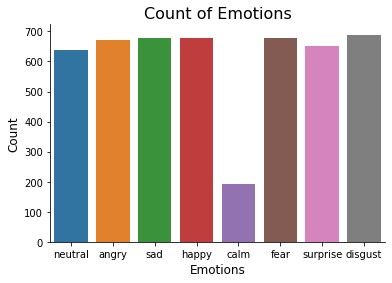

In [10]:
#Creating a plot to count the data in each unique emotion.

import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Count of Emotions', size=16)
sns.countplot(Finaldataset.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

### Data Augmentation 

In [11]:
import numpy as np
import librosa                                                          #To extract the data from the audio files.
import librosa.display

def noise(sample):
    noise_amp = 0.035*np.random.uniform()*np.amax(sample)
    sample = sample + noise_amp*np.random.normal(size=sample.shape[0])
    return sample

def stretch(sample, rate=0.8):
    return librosa.effects.time_stretch(sample, rate)

def shift(sample):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(sample, shift_range)

def pitch(sample, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(sample, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(Finaldataset.Path)[1]
sample, sample_rate = librosa.load(path)

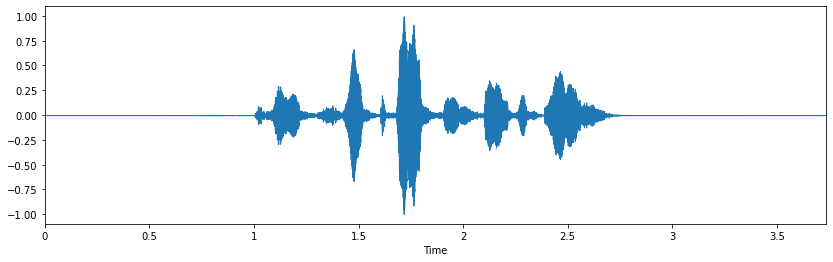

In [12]:
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=sample, sr=sample_rate)
Audio(path)

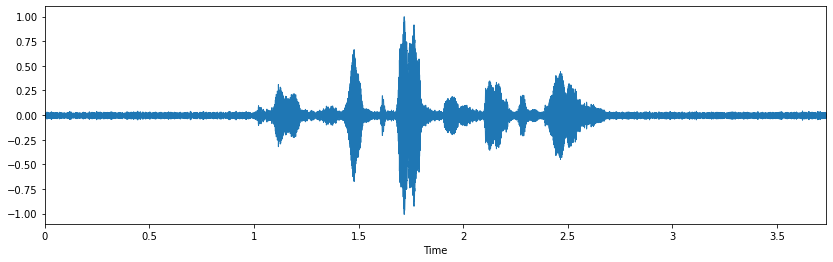

In [13]:
x = noise(sample)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

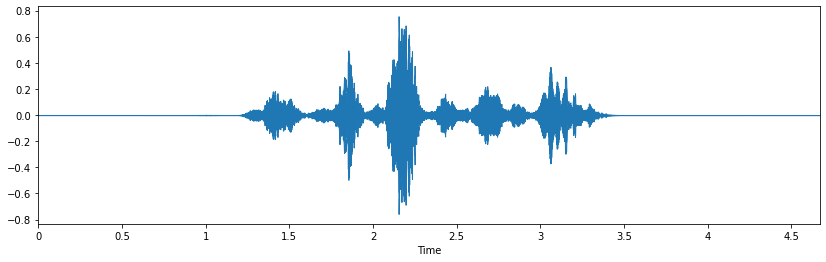

In [14]:
x = stretch(sample)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

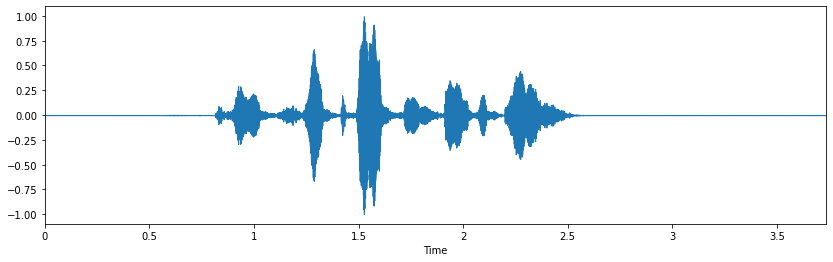

In [15]:
x = shift(sample)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

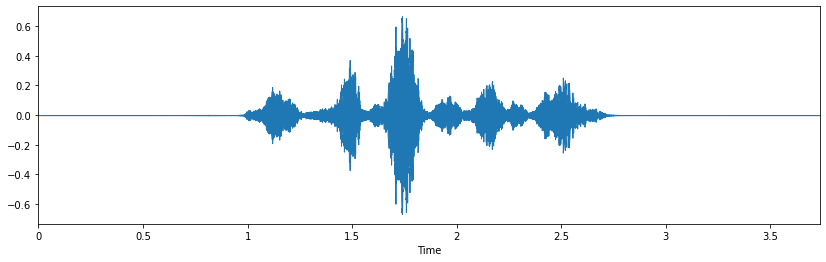

In [16]:
x = pitch(sample, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

*italicized text*###  Feature Extrction


In [17]:
import numpy as np
import librosa                                                          #To extract the data from the audio files.
import librosa.display
import librosa.feature

def extract_features(sample):
    # ZCR
    result = np.array([])
    
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=sample).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(sample))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=sample, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=sample).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=sample, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    sample, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(sample)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(sample)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(sample)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [34]:
X, Y = [], []
for path, emotion in zip(Finaldataset.Path[100], Finaldataset.Emotions[100]):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)
print(X)
print(Y)

[array([ 1.29643193e-01,  6.71242058e-01,  6.80208087e-01,  6.29433155e-01,
        5.89755177e-01,  5.99862397e-01,  6.53955460e-01,  6.39894545e-01,
        6.34881616e-01,  6.74198568e-01,  6.13736570e-01,  6.59832478e-01,
        6.59816802e-01, -4.02890045e+02,  4.44337921e+01, -5.84041834e+00,
        6.66855812e+00, -5.07246032e-02, -2.98081803e+00, -2.64594173e+00,
       -2.22404647e+00, -1.03306322e+01, -3.00753164e+00, -1.03450215e+00,
       -3.43365073e+00, -7.54270267e+00, -1.13057649e+00, -4.52775669e+00,
        2.40203643e+00, -6.28227139e+00, -3.22989631e+00, -3.45696306e+00,
       -2.01732039e+00,  3.09275985e-02,  4.21786451e+00,  2.84050070e-02,
        3.11855064e-03,  9.63996747e-04,  1.82984918e-02,  7.23920688e-02,
        1.46921262e-01,  1.14120376e+00,  5.00588560e+00,  4.46154165e+00,
        2.89304376e+00,  6.23201072e-01,  4.62545715e-02,  1.76030491e-02,
        8.44177678e-02,  1.80441216e-01,  5.16966403e-01,  1.94015491e+00,
        4.79436827e+00, 

In [19]:
len(X), len(Y), Finaldataset.Path.shape

(12, 12, (4880,))

In [35]:
import pandas as pd

Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,labels
0,0.129643,0.671242,0.680208,0.629433,0.589755,0.599862,0.653955,0.639895,0.634882,0.674199,0.613737,0.659832,0.659817,-402.890045,44.433792,-5.840418,6.668558,-0.050725,-2.980818,-2.645942,-2.224046,-10.330632,-3.007532,-1.034502,-3.433651,-7.542703,-1.130576,-4.527757,2.402036,-6.282271,-3.229896,-3.456963,-2.017320,0.030928,4.217865,0.028405,0.003119,0.000964,0.018298,0.072392,...,0.002179,0.003435,0.005363,0.006159,0.005645,0.004642,0.005547,0.004600,0.005501,0.008701,0.005789,0.010182,0.007142,0.006221,0.003069,0.002706,0.002158,0.001618,0.003545,0.001980,0.001993,0.002876,0.003015,0.002340,0.002926,0.002181,0.002042,2.284638e-03,1.451984e-03,2.261193e-03,2.670945e-03,3.602936e-03,2.893255e-03,3.592364e-03,2.682970e-03,2.846080e-03,1.781054e-03,5.982243e-04,3.862462e-05,fear
1,0.326267,0.787012,0.781345,0.758167,0.741825,0.734573,0.700167,0.631461,0.641734,0.675185,0.678885,0.749461,0.789330,-205.659938,16.010776,2.283313,2.217890,-1.459885,-3.351250,-2.062474,-1.384266,-3.371723,-3.869786,-2.308538,-2.439426,-3.078189,-1.809884,-1.869544,-1.615483,-4.027334,-2.981924,-1.670080,-2.636357,0.036828,4.273160,0.036844,0.012665,0.010479,0.026385,0.080689,...,0.012261,0.013494,0.014444,0.015609,0.013949,0.013222,0.014415,0.013492,0.013894,0.017079,0.014616,0.019717,0.016843,0.014695,0.011821,0.012613,0.011074,0.010675,0.012648,0.011122,0.010596,0.011500,0.011265,0.011445,0.011559,0.010781,0.011098,1.111271e-02,1.021371e-02,1.110438e-02,1.109393e-02,1.198409e-02,1.166404e-02,1.218712e-02,1.117395e-02,1.185735e-02,1.048201e-02,9.029584e-03,8.623404e-03,fear
2,0.125098,0.663769,0.684995,0.692507,0.615205,0.552248,0.550568,0.665939,0.622540,0.640408,0.632934,0.577232,0.640332,-447.258453,39.320732,-6.103746,2.991367,-4.382775,-4.959973,-3.021665,-3.701181,-11.327765,-3.953593,-0.862166,-4.311792,-6.382552,-1.243292,-4.543725,0.527982,-8.348258,-1.655830,-3.763542,-3.234808,0.015163,0.536851,0.004141,0.000645,0.000124,0.004037,0.017841,...,0.001023,0.000544,0.000443,0.000843,0.001221,0.001551,0.000987,0.000931,0.001587,0.000774,0.002607,0.001426,0.001841,0.001666,0.001643,0.000969,0.000664,0.000659,0.000425,0.000465,0.000675,0.000478,0.000502,0.000843,0.000555,0.000682,0.000594,5.240539e-04,5.757291e-04,4.800484e-04,3.150488e-04,4.994745e-04,6.542889e-04,8.083412e-04,5.492957e-04,6.141100e-04,4.391192e-04,1.396210e-04,6.204552e-06,fear
3,0.063477,0.543312,0.512528,0.516724,0.535872,0.607934,0.643923,0.712095,0.721970,0.688531,0.706272,0.734550,0.674034,-422.411011,140.939148,5.037968,59.085613,-16.644918,27.846685,-17.539864,13.887680,-14.848896,5.867993,-1.010891,-9.824169,5.826033,-11.133159,6.938949,-9.960578,6.776917,-6.118142,-0.906447,-3.949025,0.009457,0.043528,0.028032,0.050008,0.072499,0.075226,0.115903,...,0.000133,0.000205,0.000178,0.000126,0.000084,0.000062,0.000053,0.000057,0.000046,0.000041,0.000055,0.000102,0.000187,0.000290,0.000313,0.000480,0.000412,0.000589,0.000442,0.000276,0.000314,0.000334,0.000345,0.000321,0.000198,0.000030,0.000003,1.487928e-08,2.026433e-09,1.417491e-09,1.068985e-09,8.491863e-10,7.033308e-10,6.015753e-10,5.293448e-10,4.779300e-10,4.415431e-10,4.172852e-10,4.030534e-10,neutral
4,0.093888,0.593819,0.571742,0.577459,0.598368,0.668725,0.676570,0.719369,0.716883,0.689452,0.711746,0.742822,0.696987,-370.768361,84.797304,40.925416,28.253754,9.401616,7.028807,-1.157493,1.290087,-4.500516,0.241215,-1.314436,-5.430153,-0.943491,-3.721512,-0.497000,-2.280453,0.175665,-1.525867,-3.658689,-3.008956,0.009527,0.044063,0.028340,0.050135,0.073075,0.075742,0.115945,...,0.000211,0.000301,0.000262,0.000198,0.000144,0.000126,0.000124,0.000127,0.000115,0.000119,0.000126,0.000178,0.000263,0.000354,0.000388,0.000567,0.000491,0.000646,0.000504,0

### Splitting the data


In [45]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [46]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
# print some details
# number of samples in training data
print("[+] Number of training samples:", x_train.shape[0])
# number of samples in testing data
print("[+] Number of testing samples:", x_test.shape[0])
# number of features used
# this is a vector of features extracted 
# using utils.extract_features() method
print("[+] Number of features:", x_train.shape[1])

[+] Number of training samples: 9
[+] Number of testing samples: 3
[+] Number of features: 162


In [66]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((9, 162), (9, 4), (3, 162), (3, 4))

In [67]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


dtree_model = DecisionTreeClassifier(max_depth = 2).fit(x_train, y_train) 
dtree_predictions = dtree_model.predict(x_test) 

print(accuracy_score(y_true=y_test,y_pred=dtree_predictions))
print(classification_report(y_test,dtree_predictions)) 
# creating a confusion matrix 
print(confusion_matrix(y_test.values.argmax(axis=1), predictions.argmax(axis=1)) )

0.3333333333333333
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1

   micro avg       0.33      0.33      0.33         3
   macro avg       0.12      0.25      0.17         3
weighted avg       0.17      0.33      0.22         3
 samples avg       0.33      0.33      0.33         3



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AttributeError: ignored

In [68]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


dtree_model = DecisionTreeClassifier(max_depth = 6).fit(x_train, y_train) 
dtree_predictions = dtree_model.predict(x_test) 

print(accuracy_score(y_true=y_test,y_pred=dtree_predictions))
print(classification_report(y_test,dtree_predictions)) 
# creating a confusion matrix 
print(confusion_matrix(y_test.values.argmax(axis=1), predictions.argmax(axis=1)) )

0.6666666666666666
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00         1
           2       0.50      1.00      0.67         1
           3       0.00      0.00      0.00         1

   micro avg       0.67      0.67      0.67         3
   macro avg       0.38      0.50      0.42         3
weighted avg       0.50      0.67      0.56         3
 samples avg       0.67      0.67      0.67         3



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AttributeError: ignored

In [69]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(9, 162, 1)
(9, 4)
(3, 162, 1)
(3, 4)


In [61]:
from sklearn import svm
import numpy as np
import matplotlib as mpl
from sklearn.model_selection import train_test_split
